# Projeto Ciência de Dados : Previsão de Renda

## Etapa 1 CRISP - DM: Entendimento do negócio

Este projeto trata-se de um projeto didático, desenvolvido como um dos requisitos para a conclusão do curso "Profissão: Cientista de Dados" oferecido pela EBAC (Escola Britânica de Artes Criativas). O projeto será realizado com as ferramentas e estratégias aprendidas até o módulo 15 do curso  e seu objetivo principal é estudar diversos modelos preditivos de regressão, construindo um modelo preditivo de renda utilizando uma base de dados simulada que busca se aproximar de uma base real.

### Contextualização do Problema

Supõe-se que uma instituição financeira deseja conhecer melhor o perfil de renda de seus novos clientes para diversos fins, como melhor dimensionar o limite de cartões de crédito dos novos clientes, sem a necessidade de solicitar olerites ou documentações que impactem na experiência do cliente.

Para atender a essa demanda, a instituição financeira conduziu um estudo com alguns clientes, comprovando suas rendas por meio de olerites e outros documentos. O objetivo agora é construir um modelo preditivo para estimar a renda com base em algumas variáveis já disponíveis no banco de dados.

### Objetivos do Projeto

Os principais objetivos deste projeto são:

- Construir um modelo preditivo de renda utilizando técnicas de ciência de dados.
- Estimar a renda dos novos clientes com base nas variáveis disponíveis no banco de dados.
- Melhorar a tomada de decisões relacionadas ao dimensionamento do limite de cartões de crédito dos clientes, proporcionando uma experiência mais ágil e conveniente para eles.

### Benefícios para a Instituição Financeira

Ao construir um modelo preditivo de renda, a instituição financeira pode se beneficiar das seguintes maneiras:

- Agilidade no processo de análise de crédito: Com um modelo preditivo confiável, a instituição pode estimar a renda dos clientes de forma rápida e precisa, evitando a necessidade de solicitar olerites ou outros documentos que possam atrasar o processo de análise de crédito.
- Melhoria na experiência do cliente: Ao eliminar a necessidade de fornecer documentações adicionais, a instituição proporciona uma experiência mais conveniente e ágil para seus clientes, reduzindo possíveis atritos e melhorando a satisfação geral.
- Tomada de decisões embasadas em dados: O modelo preditivo fornecerá informações valiosas para a instituição, permitindo melhor dimensionamento do limite de cartões de crédito dos clientes com base em suas rendas estimadas. Isso ajudará a evitar concessões de crédito excessivas ou limites muito baixos, reduzindo riscos e otimizando a gestão de crédito.


## Etapa 2 Crisp-DM: Entendimento dos dados

Nesta etapa, realizaremos uma análise aprofundada dos dados disponíveis para a construção do modelo preditivo de renda. O objetivo é compreender as características, a qualidade e a relevância das variáveis presentes no conjunto de dados simulado, buscando insights valiosos para o desenvolvimento do projeto.


### Dicionário de dados

Descrição das variáveis da base de dados


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência do registro                     | string       |
| id_cliente              |  Identificação do cliente                           | inteiro      |
| sexo                    |  F para sexo Feminino e M para Masculino            | string       |
| posse_de_veiculo        |  Se o cliente possui ou não automóvel               | booleano     |
| posse_de_imovel         |  Se o cliente tem ou não filhos                     | booleano     |
| qtd_filhos              |  Quantidade de filhos do cliente                    | inteiro      |
| tipo_renda              |  Tipo da renda do cliente                           | string       |
| educacao                |  Nível de escolaridade do cliente                   | string       |
| estado_civil            |  Estado civil do cliente                            | string       |
| tipo_residencia         |  Tipo da residência do cliente                      | string       |
| idade                   |  Idade do cliente                                   | inteiro      |
| tempo_emprego           |  Tempo que o cliente está no atual emprego          | decimal      |
| qt_pessoas_residencia   |  Quantidade de pessoas que moram com o cliente      | decimal      |
| renda                   |  Renda mensal do cliente                            | decimal      |





#### Carregando os pacotes


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


from patsy import dmatrix
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



#### Carregando os dados


In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv', sep = ',', decimal='.',index_col = 0)
renda.head() 

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [3]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   id_cliente             15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

### Exploração Inicial dos Dados

#### Univariada
 

#### Variáveis Numéricas
A seguir serão analisadas estatísticas descritivas das variáveis numéricas, como média, mediana, desvio padrão, mínimo e máximo.Também serão investigadas as distribuições das variáveis para identificar possíveis desvios e outliers.

In [4]:
renda.iloc[:,2:].describe() #retirado a coluna id_cliente que apesar de numérica não faz sentido ser analisada

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.000000,12427.000000,15000.000000,15000.000000
mean,0.432333,43.882333,7.722635,2.206400,5697.287057
std,0.746631,11.273155,6.711189,0.909792,8266.816289
min,0.000000,22.000000,0.117808,1.000000,118.710000
25%,0.000000,34.000000,2.973973,2.000000,2026.110000
50%,0.000000,43.000000,6.013699,2.000000,3499.720000
75%,1.000000,53.000000,10.120548,3.000000,6392.167500
max,14.000000,68.000000,42.906849,15.000000,245141.670000


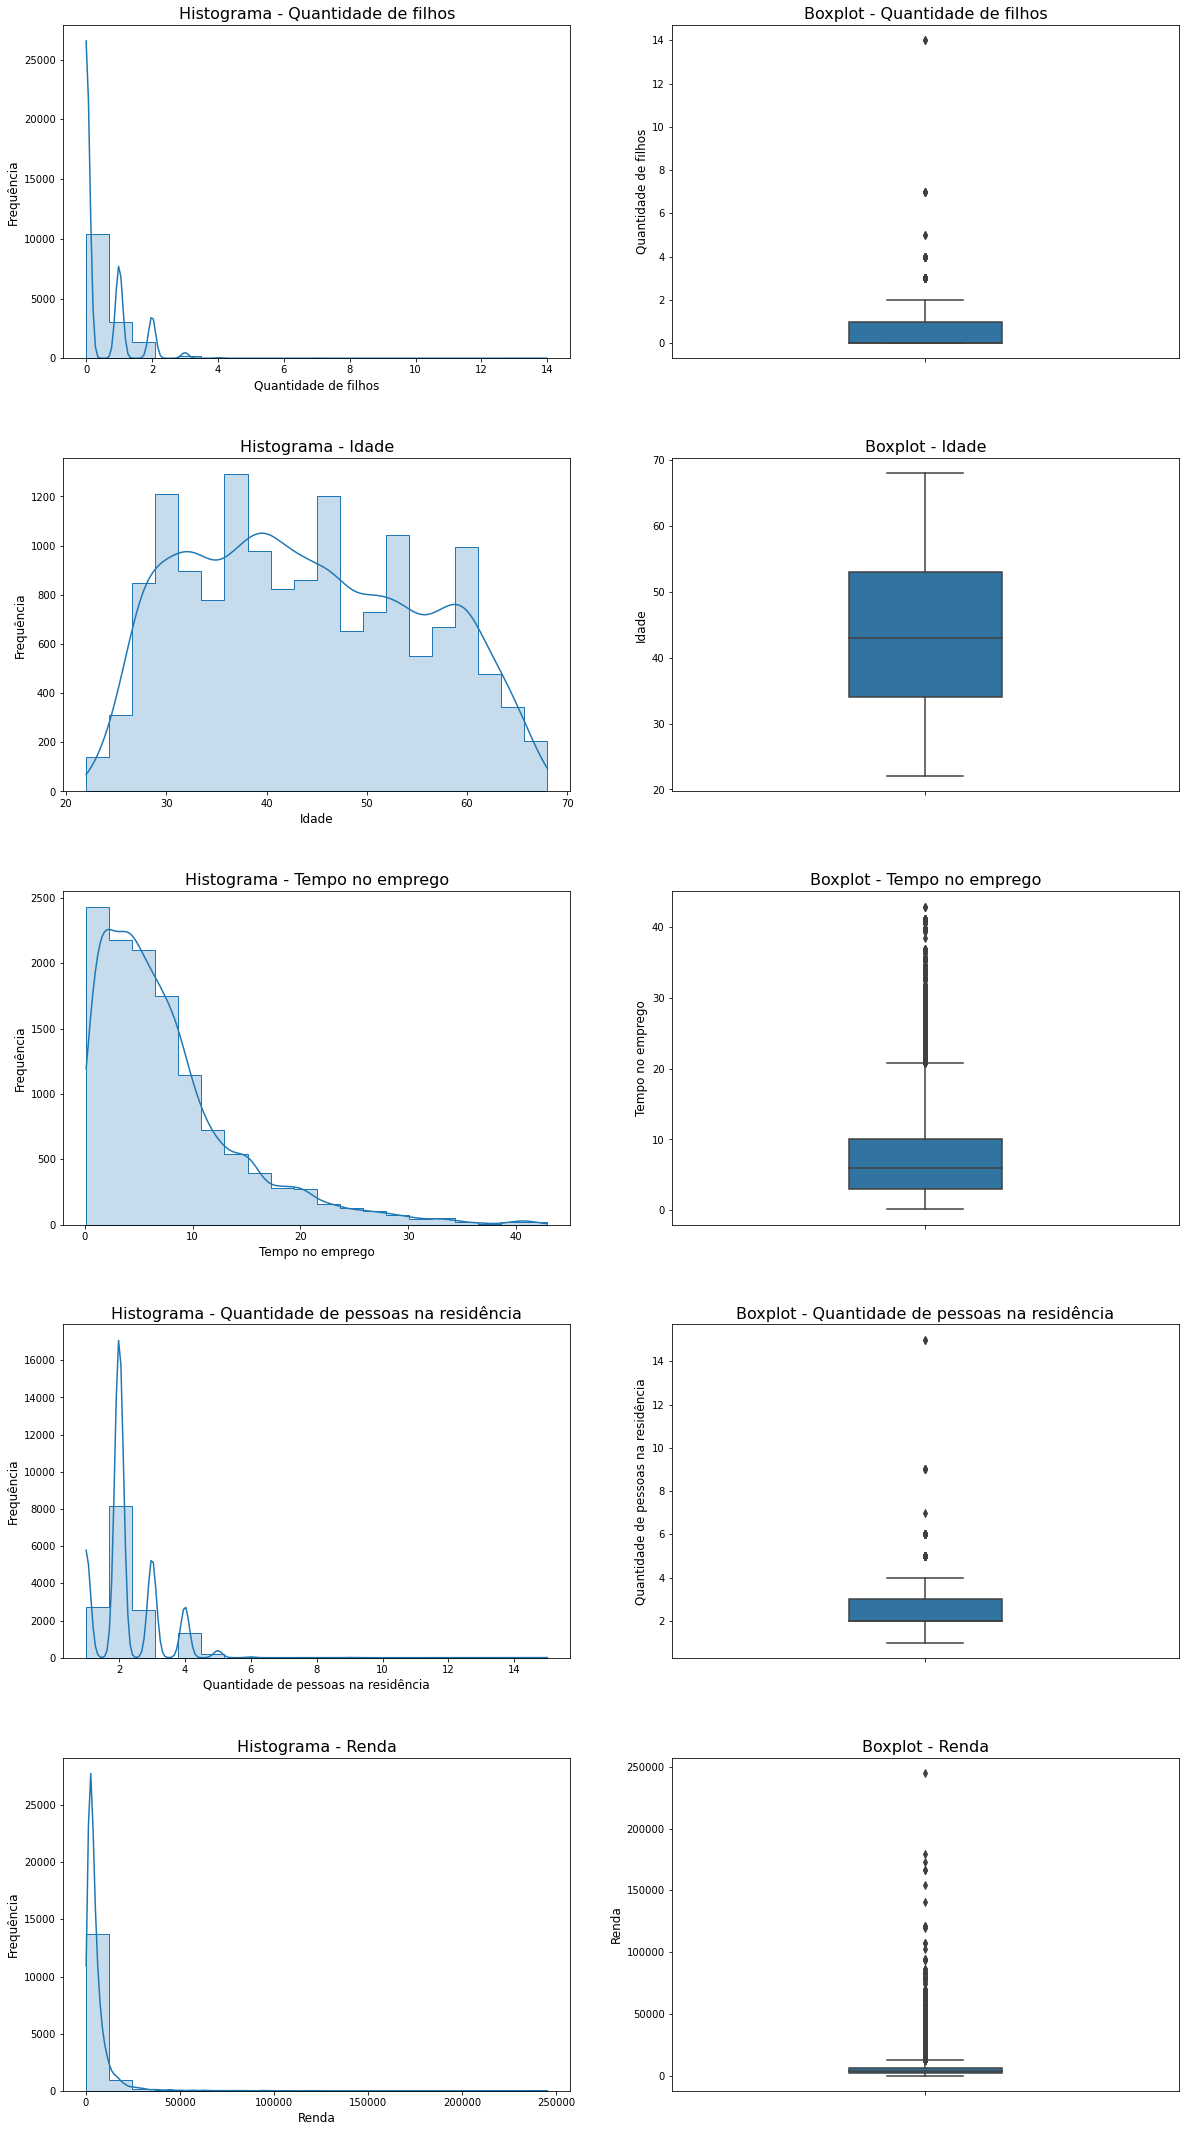

In [5]:
#Plotando os Graficos das variáveis quantitavas

#estabelecendo uma grade de gráficos de 5 linhas e 2 colunas
plt.rc('figure', figsize=(20, 38))
fig, axes = plt.subplots(5, 2)
plt.subplots_adjust(hspace= 0.3)

lista_var_quant = list(renda.select_dtypes(include='number').columns[1:]) #lista das variáveis quantitativas/numéricas exceto id_cliente
lista_labelx_var = ['Quantidade de filhos','Idade','Tempo no emprego', 'Quantidade de pessoas na residência', 'Renda'] #lista com o nome a ser colocado no eixo x dos gráficos
i=0 # contador para posição do ax na grade 

#loop para fazer os histogramas para todas as variáveis quantitativas
for var in lista_var_quant:

    chart = sns.histplot(data = renda,                   
                 alpha = .25, 
                 x = var,
                 bins = 20,
                 element = 'step',
                 kde = True, 
                 ax=axes[i,0])
    chart.set_xlabel(lista_labelx_var[i], fontsize=12)
    chart.set_ylabel('Frequência',  fontsize=12)
    chart.set_title('Histograma - ' + lista_labelx_var[i], fontsize=16)
    i=i+1
    

#loop para fazer os boxplots para todas as variáveis quantitativas
i=0
for var in lista_var_quant:
    
    chart = sns.boxplot(y= var, data = renda, width = 0.3 ,ax=axes[i,1])
    chart.set_ylabel(lista_labelx_var[i],fontsize=12)
    chart.set_title('Boxplot - ' + lista_labelx_var[i], fontsize=16)
    i=i+1

 Do quadro e gráficos acima pode-se destacar:
 
 - Todas as variáveis possuem 15.000 registros exceto "*tempo_emprego*" que possue dados faltantes e deverá ser tratada;
 - A maioria dos clientes da instituição não possui filhos , apenas 25% possui  1 filho ou mais;
 - O máximo de filhos dos clientes é 14, esse número é bastante elevado e pode indicar um outlier;
 - A idade dos clientes é bem varida, eles possuem entre 22 e 68 anos, sendo metade dos clientes com até 43 anos e metade de 43 a 68 anos;
 - Tempo médio que os clientes estão empregados é por volta dos 6 anos;
 - 75% dos clientes moram com até 2 pessoas na residência;
 - O máximo de pessoas morando na mesma residência de um cliente é 15, um número elevado que pode indicar um outlier;
 - 75%  dos clientes tem renda  até 6.393, no entanto na base de dados há individuos com renda de até 250.000, esses índividuos muito fora do padrão de renda da maioria dos clientes podem atrapalhar o modelo de previsão e podem ser considerados outliers.


#### Variáveis Qualitativas

Será feita uma contagem das categorias presentes nas variáveis categóricas para entender a distribuição dos dados e identificar possíveis inconsistências ou valores ausentes.

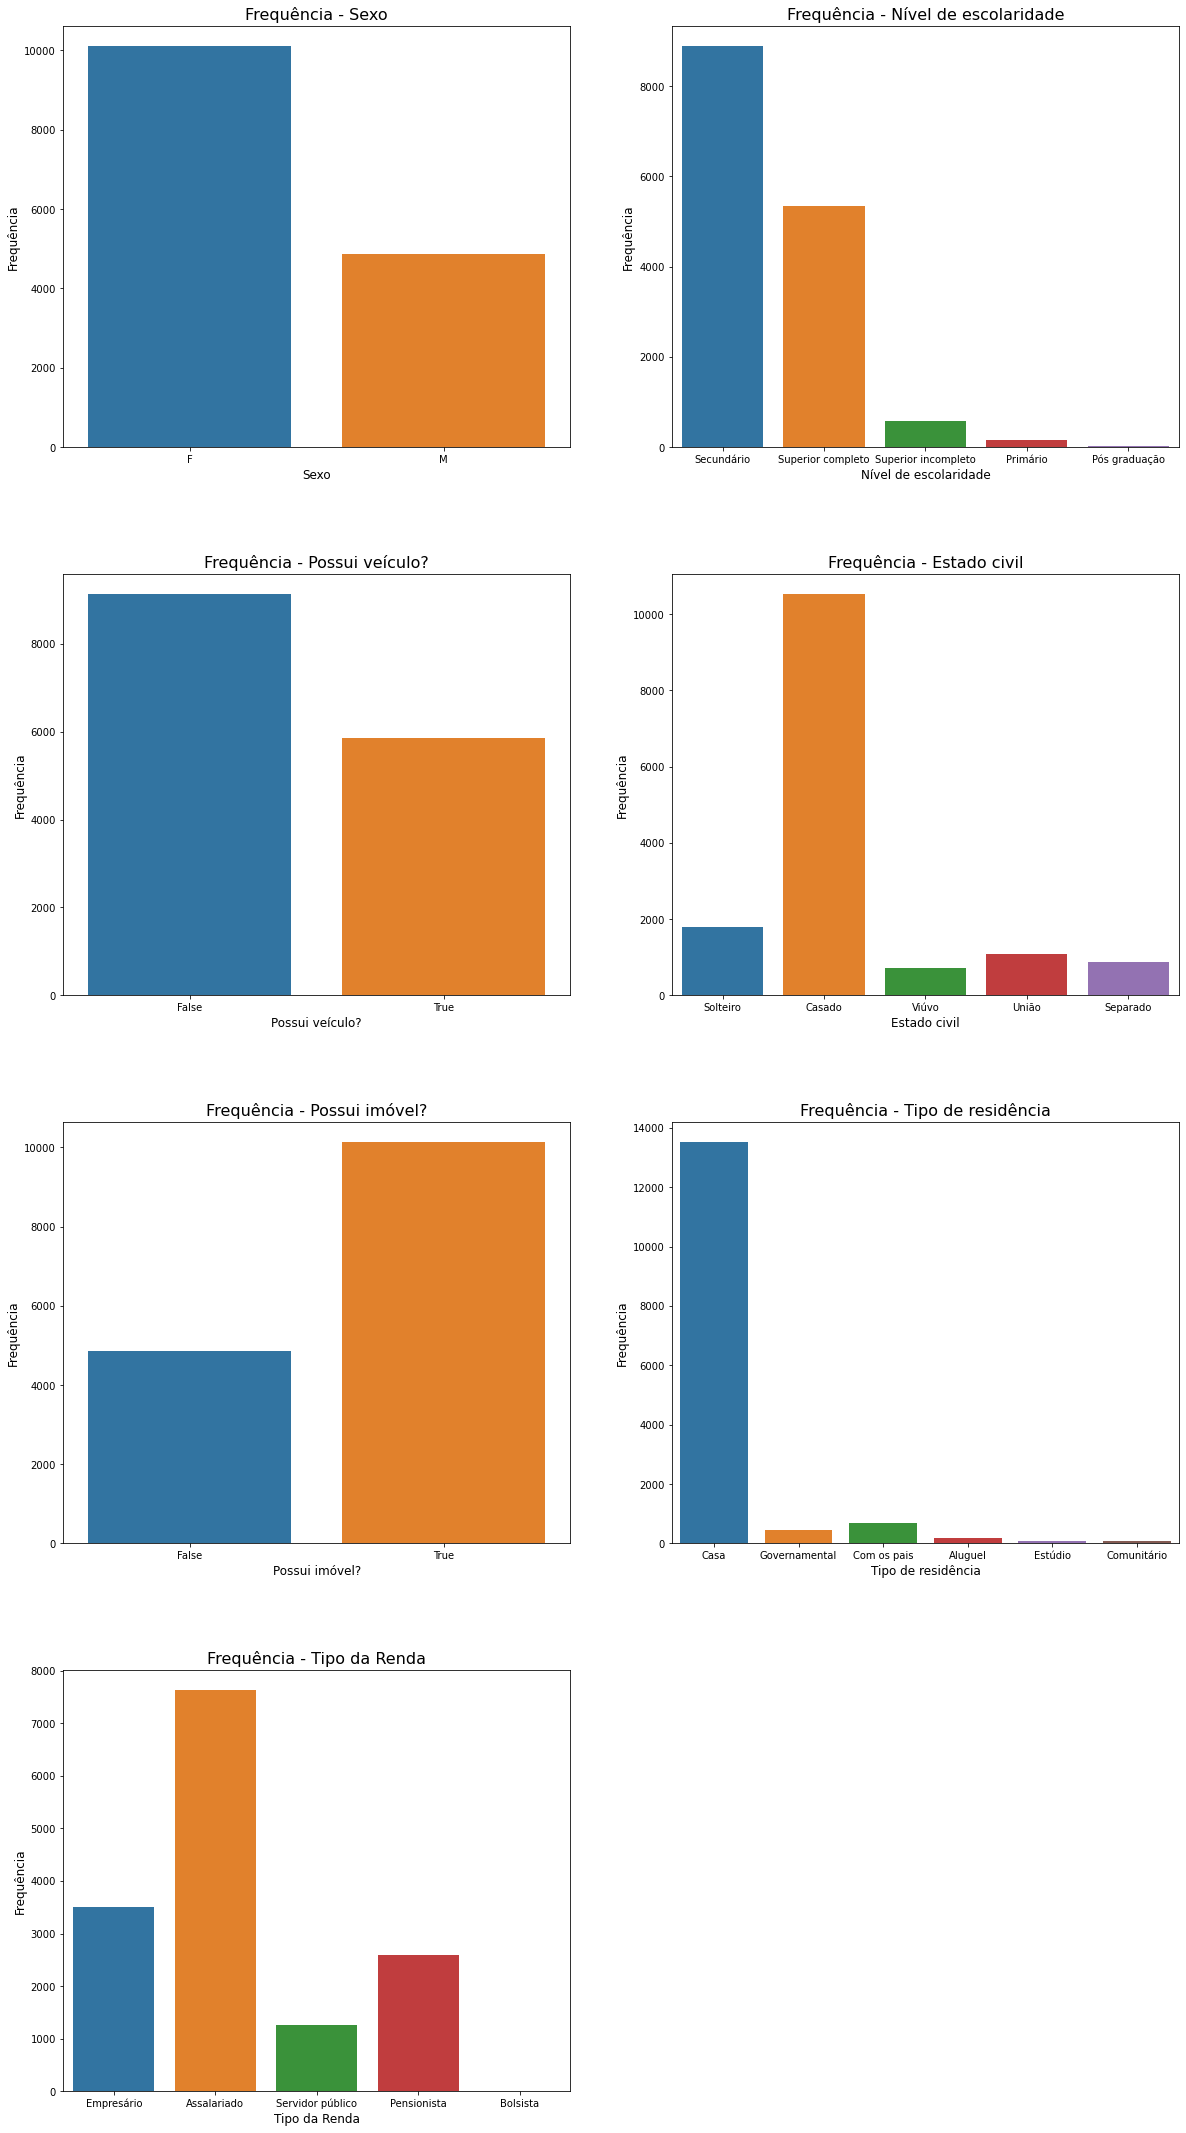

In [6]:
#Plotando os gráficos das variáveis qualitativas

#estabelecendo uma grade de gráficos de 4 linhas e 2 colunas
plt.rc('figure', figsize=(20, 38))
fig, axes = plt.subplots(4, 2)
plt.subplots_adjust(hspace= 0.3)

lista_var_quali = list(renda.select_dtypes(include=['object','bool']).columns[1:]) #lista das variáveis qualitativas exceto data_ref
lista_labelx_var = ['Sexo','Possui veículo?', 'Possui imóvel?', 'Tipo da Renda', 'Nível de escolaridade', 'Estado civil', 'Tipo de residência'] #lista com o nome a ser colocado no eixo x dos gráficos
i = 0 # contador para posição do ax na grade 

#loop para fazer os gráficos de barras das variáveis qualitativas na coluna 0 da grade de gráficos

for var in lista_var_quali[:4]:
    chart = sns.countplot(ax = axes[i,0], x = var, data=renda)
    chart.set_xlabel(lista_labelx_var[i], fontsize=12)
    chart.set_ylabel('Frequência',  fontsize=12)
    chart.set_title('Frequência - ' + lista_labelx_var[i], fontsize=16)
    i=i+1
   
#loop para fazer os gráficos de barras das variáveis qualitativas na coluna 1 da grade de gráficos
i=0
for var in lista_var_quali[4:]:

    chart = sns.countplot(ax = axes[i,1], x = var, data=renda)
    chart.set_xlabel(lista_labelx_var[i+4], fontsize=12)
    chart.set_ylabel('Frequência',  fontsize=12)
    chart.set_title('Frequência - ' + lista_labelx_var[i+4], fontsize=16)
    i=i+1    

    
fig.delaxes(axes[3, 1]) # apaga o gráfico no subplot[3,1] que não está sendo utilizado

### Entendimento dos dados - Bivariadas




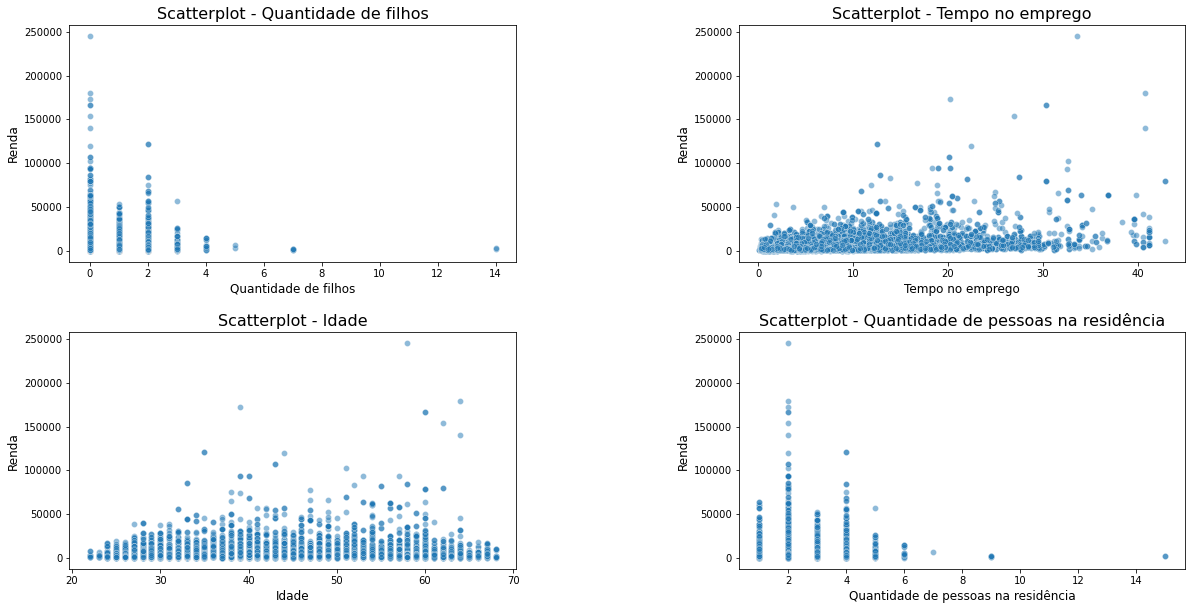

In [7]:
#Plotando os gráficos das variáveis quantitativas

#estabelecendo uma grade de gráficos de 4 linhas e 2 colunas
plt.rc('figure', figsize=(20, 10))
fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(hspace= 0.3,wspace = 0.5)

lista_var_quant = list(renda.select_dtypes(include='number').columns[1:5]) #lista das variáveis quantitativas/numéricas exceto id_cliente e renda
lista_labelx_var = ['Quantidade de filhos','Idade','Tempo no emprego', 'Quantidade de pessoas na residência'] #lista com o nome a ser colocado no eixo x dos gráficos
i=0 # contador para posição do ax na grade 

#loop para fazer os histogramas

for var in lista_var_quant[:2]:
    chart = sns.scatterplot(x = var, y = 'renda', data = renda, alpha = .5, ax = axes[i,0])
    chart.set_xlabel(lista_labelx_var[i], fontsize=12)
    chart.set_ylabel('Renda',  fontsize=12)
    chart.set_title('Scatterplot - ' + lista_labelx_var[i], fontsize=16)
    i=i+1
    
#loop para fazer os gráficos de barras das variáveis qualitativas na coluna 1 da grade de gráficos
i=0
for var in lista_var_quant[2:]: 

    chart = sns.scatterplot(x = var, y = 'renda', data = renda, alpha = .5, ax = axes[i,1])
    chart.set_xlabel(lista_labelx_var[i+2], fontsize=12)
    chart.set_ylabel('Renda',  fontsize=12)
    chart.set_title('Scatterplot - ' + lista_labelx_var[i+2], fontsize=16)
    i=i+1    


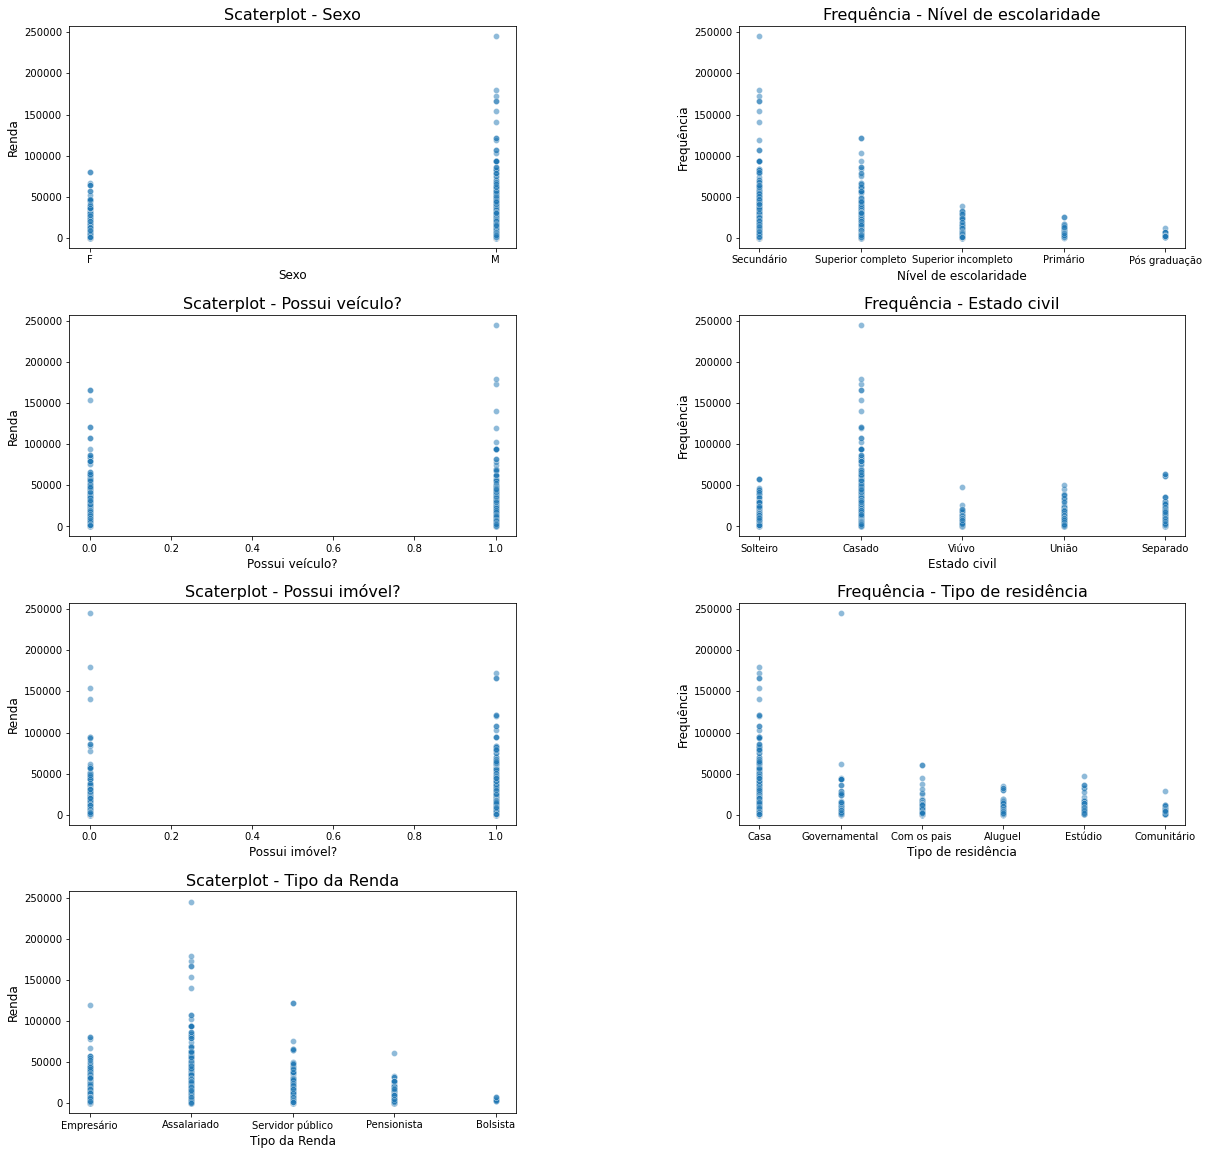

In [8]:
#Plotando os gráficos das variáveis qualitativas

#estabelecendo uma grade de gráficos de 4 linhas e 2 colunas
plt.rc('figure', figsize=(20, 20))
fig, axes = plt.subplots(4, 2)
plt.subplots_adjust(hspace= 0.3,wspace = 0.5)

lista_var_quali_ = list(renda.select_dtypes(include=['object','bool']).columns[1:]) #lista das variáveis qualitativas exceto data_ref
lista_labelx_var = ['Sexo','Possui veículo?', 'Possui imóvel?', 'Tipo da Renda', 'Nível de escolaridade', 'Estado civil', 'Tipo de residência'] #lista com o nome a ser colocado no eixo x dos gráficos
i = 0 # contador para posição do ax na grade 

#loop para fazer gráficos  na coluna 0

for var in lista_var_quali[:4]:
    chart = sns.scatterplot(x = var, y = 'renda', data = renda, alpha = .5, ax = axes[i,0])
    chart.set_xlabel(lista_labelx_var[i], fontsize=12)
    chart.set_ylabel('Renda',  fontsize=12)
    chart.set_title('Scaterplot - ' + lista_labelx_var[i], fontsize=16)
    i=i+1
   
#loop para fazer os gráficos na coluna 1 da grade de gráficos

i=0
for var in lista_var_quali[4:]:

    chart = sns.scatterplot(x = var, y = 'renda', data = renda, alpha = .5, ax = axes[i,1])
    chart.set_xlabel(lista_labelx_var[i+4], fontsize=12)
    chart.set_ylabel('Frequência',  fontsize=12)
    chart.set_title('Frequência - ' + lista_labelx_var[i+4], fontsize=16)
    i=i+1 
    
fig.delaxes(axes[3, 1]) # apaga o gráfico no subplot[3,1] que não está sendo utilizado


#### Análise das variáveis no tempo

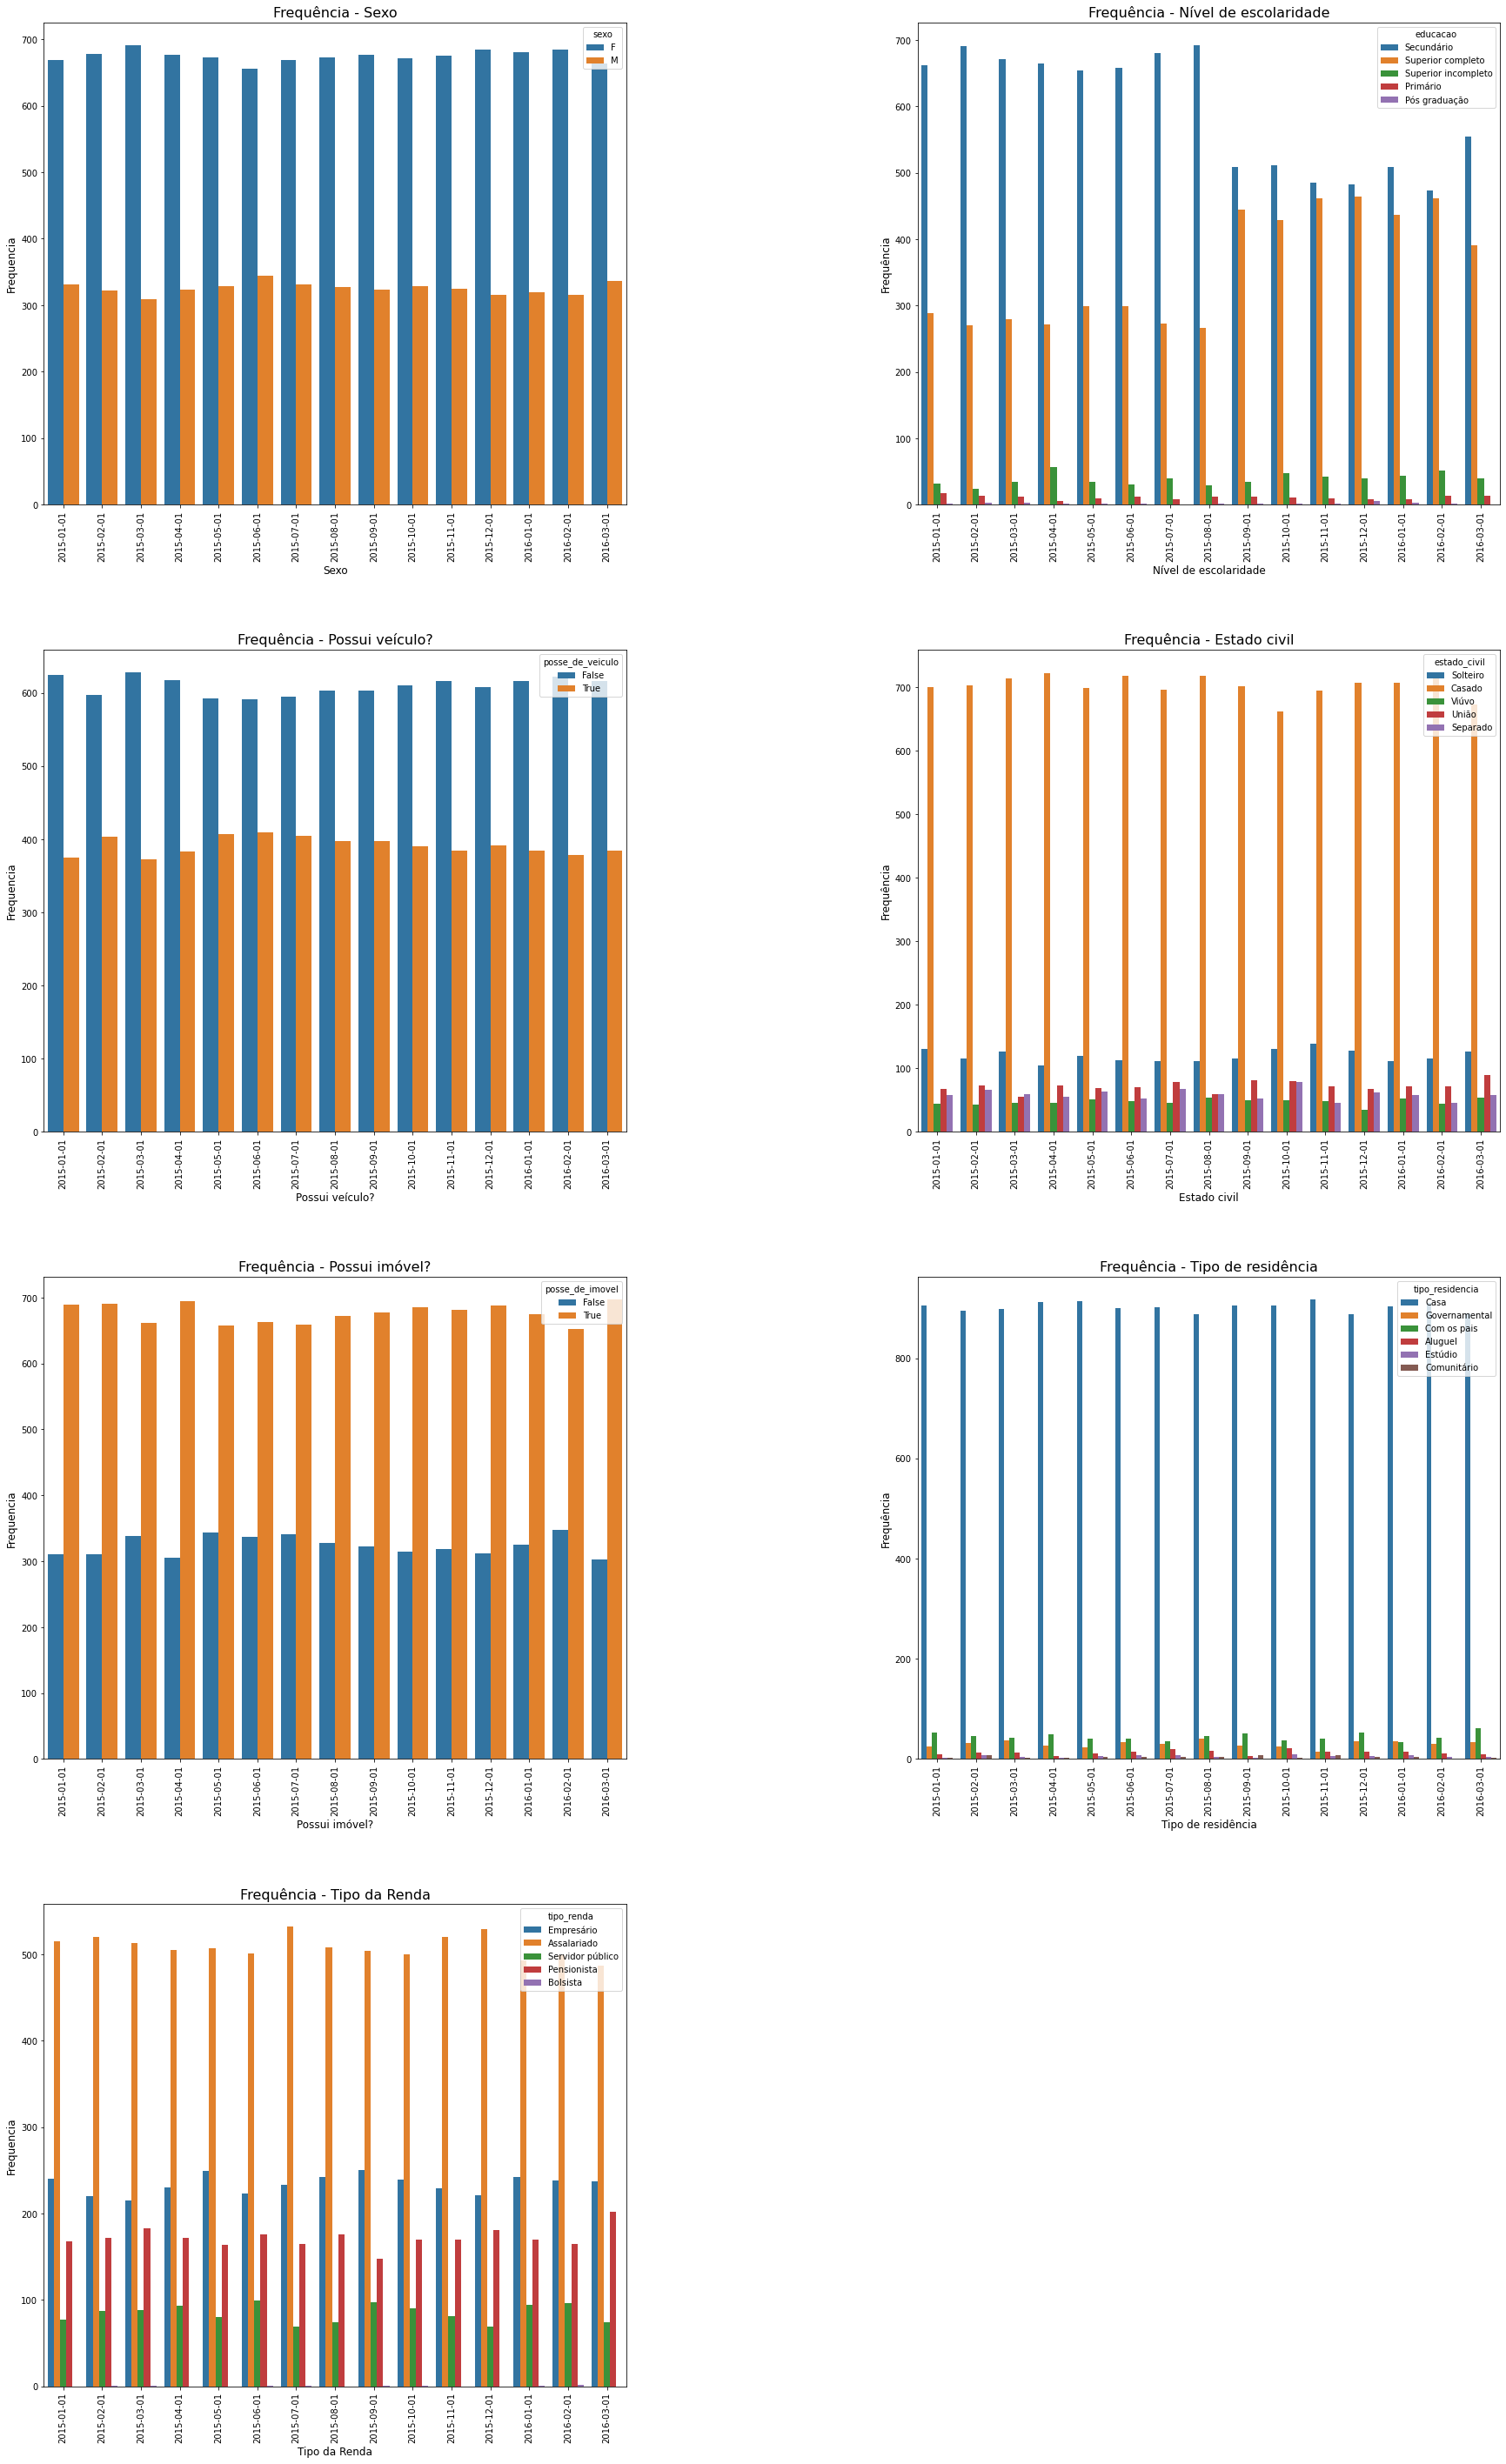

In [9]:
#Plotando os gráficos das frequências ao longo do tempo para cada variável qualitativa

#estabelecendo uma grade de gráficos de 4 linhas e 2 colunas
plt.rc('figure', figsize=(30, 50))
fig, axes = plt.subplots(4, 2)
plt.subplots_adjust(hspace= 0.3,wspace = 0.5)

lista_var_quali_ = list(renda.select_dtypes(include=['object','bool']).columns[1:]) #lista das variáveis qualitativas exceto data_ref
lista_labelx_var = ['Sexo','Possui veículo?', 'Possui imóvel?', 'Tipo da Renda', 'Nível de escolaridade', 'Estado civil', 'Tipo de residência'] #lista com o nome a ser colocado no eixo x dos gráficos
tick_lab = renda.data_ref.unique()
i = 0 # contador para posição do ax na grade 

#loop para fazer gráficos  na coluna 0

for var in lista_var_quali[:4]:
    
    chart=sns.countplot(x='data_ref', hue = var, data=renda, ax= axes[i,0])
    chart.set_xlabel(lista_labelx_var[i], fontsize=12)
    chart.set_ylabel('Frequencia',  fontsize=12)
    chart.set_title('Frequência - ' + lista_labelx_var[i], fontsize=16)
    chart.set_xticklabels(tick_lab, rotation=90)
    i=i+1
   
#loop para fazer os gráficos na coluna 1 da grade de gráficos

i=0
for var in lista_var_quali[4:]:

    chart=sns.countplot(x='data_ref', hue = var, data=renda, ax= axes[i,1])
    chart.set_xlabel(lista_labelx_var[i+4], fontsize=12)
    chart.set_ylabel('Frequência',  fontsize=12)
    chart.set_title('Frequência - ' + lista_labelx_var[i+4], fontsize=16)
    chart.set_xticklabels(tick_lab, rotation=90)
    i=i+1
    
fig.delaxes(axes[3, 1]) # apaga o gráfico no subplot[3,1] que não está sendo utilizado

Em geral, ao  dividir nossa base em amostras pela data de referência dos registros, percebemos que as proporções das categorias possiveis das variáveis se mantém estaveis ao longo do tempo, exceto na variável escolaridade onde houve um aumento acentuado de clientes com nivel de escolaridade superior e uma queda acentuada de pessoas com nível secundário a partir de 09/2015.

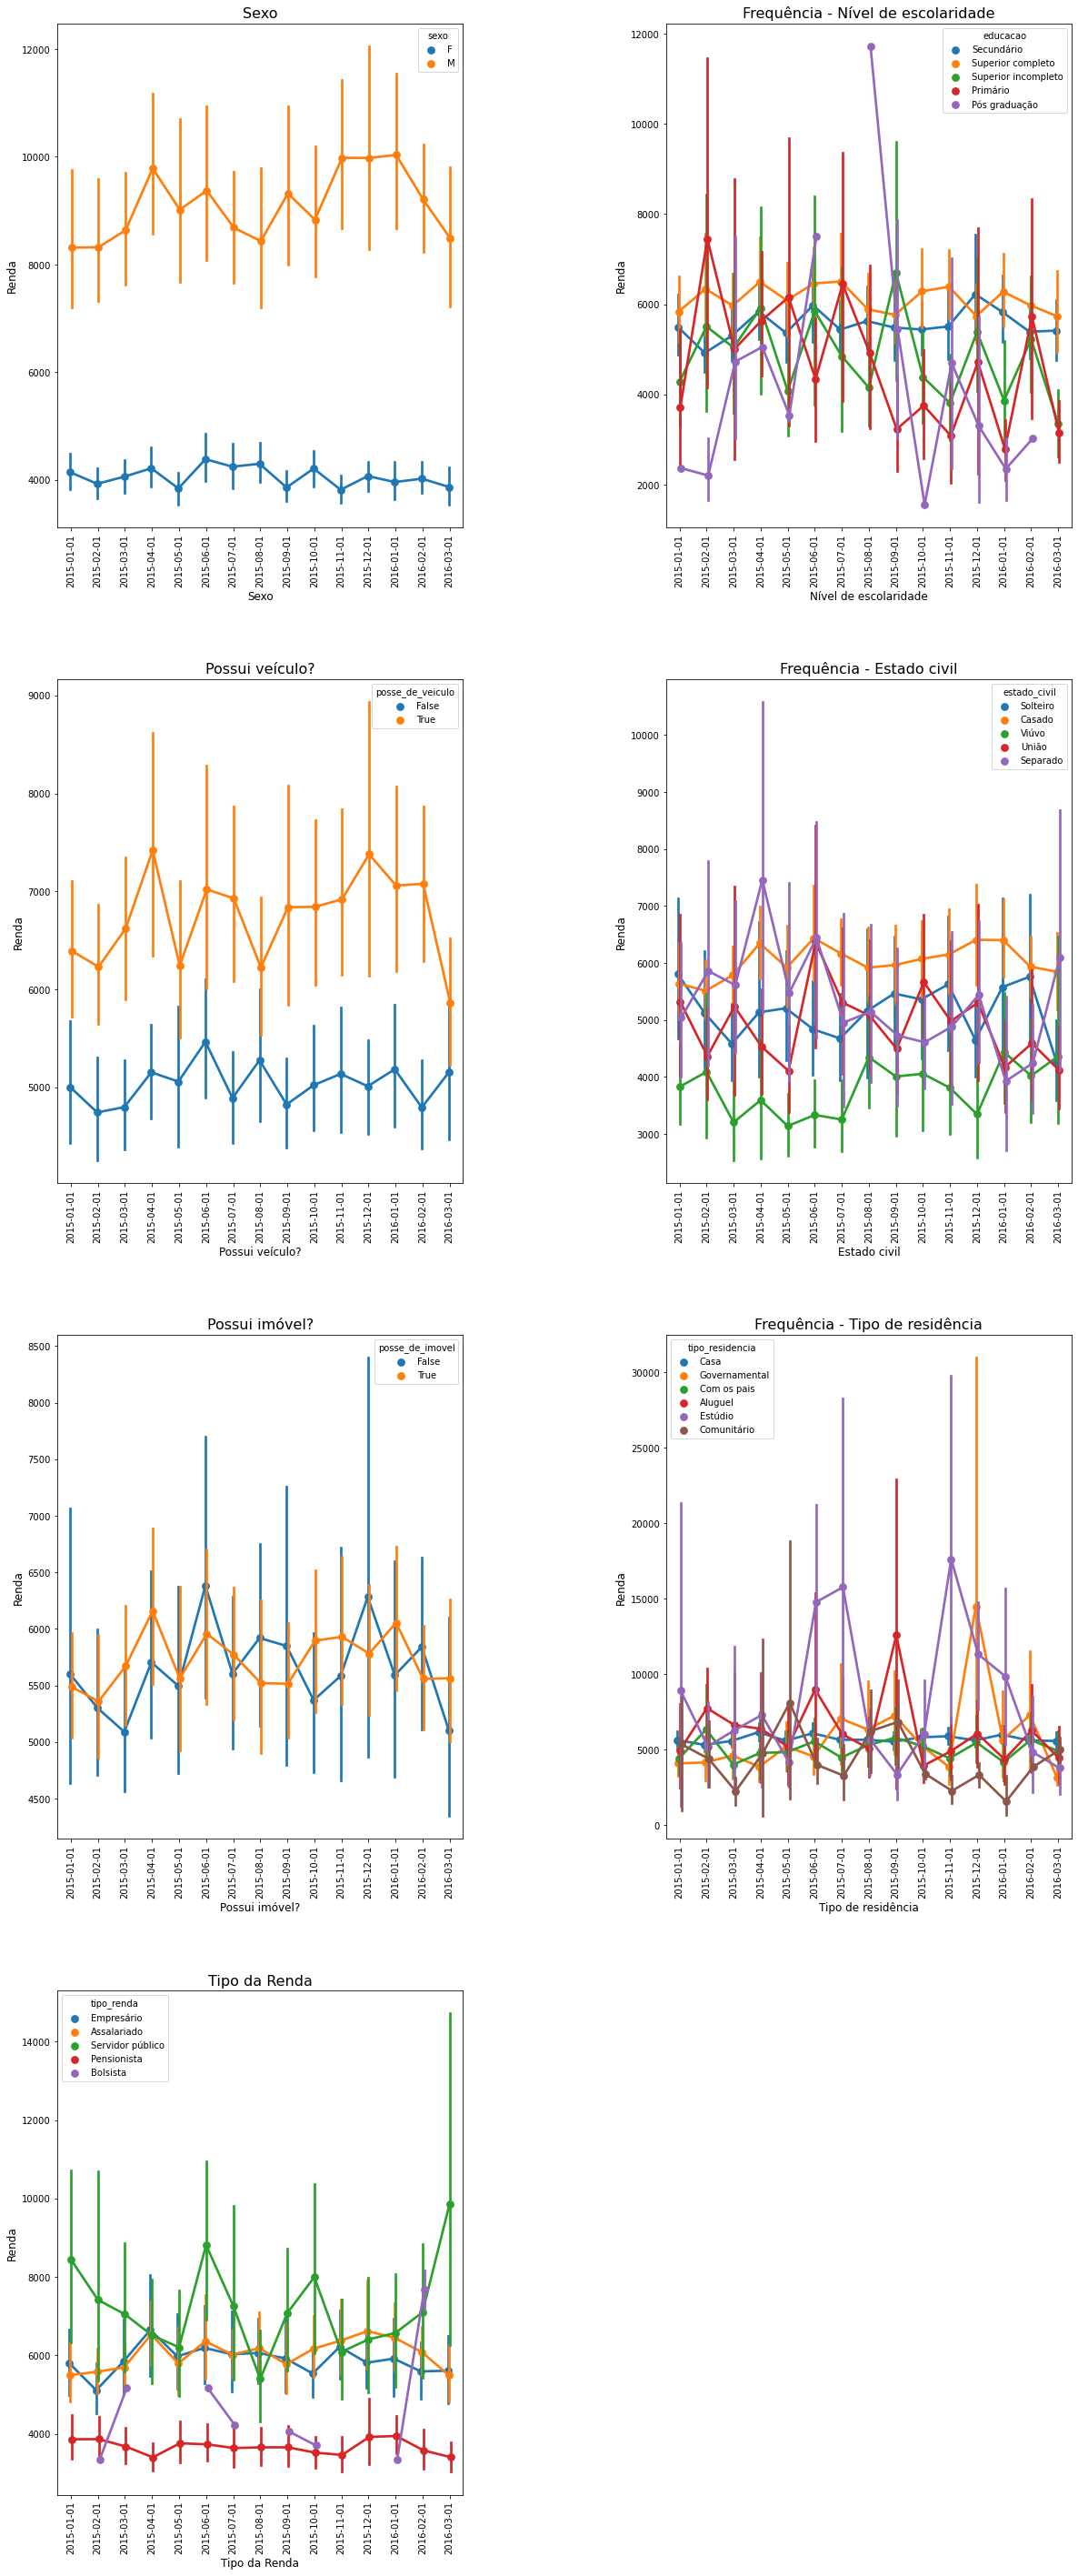

In [10]:
#Plotando os gráficos dos perfis das médias das rendas ao longo do tempo para cada variável qualitativa

#estabelecendo uma grade de gráficos de 4 linhas e 2 colunas
plt.rc('figure', figsize=(20, 50))
fig, axes = plt.subplots(4, 2)
plt.subplots_adjust(hspace= 0.3,wspace = 0.5)

lista_var_quali_ = list(renda.select_dtypes(include=['object','bool']).columns[1:]) #lista das variáveis qualitativas exceto data_ref
lista_labelx_var = ['Sexo','Possui veículo?', 'Possui imóvel?', 'Tipo da Renda', 'Nível de escolaridade', 'Estado civil', 'Tipo de residência'] #lista com o nome a ser colocado no eixo x dos gráficos
i = 0 # contador para posição do ax na grade 

#loop para fazer gráficos  na coluna 0

for var in lista_var_quali[:4]:
    chart = sns.pointplot(x="data_ref", y="renda", hue = var,data=renda, dodge=True, ci = 95, ax = axes[i,0])
    chart.set_xlabel(lista_labelx_var[i], fontsize=12)
    chart.set_ylabel('Renda',  fontsize=12)
    chart.set_title(lista_labelx_var[i], fontsize=16)
    chart.set_xticklabels(tick_lab, rotation=90)
    i=i+1
   
#loop para fazer os gráficos na coluna 1 da grade de gráficos

i=0
for var in lista_var_quali[4:]:

    chart = sns.pointplot(x="data_ref", y="renda", hue = var,data=renda, dodge=True, ci = 95, ax = axes[i,1])
    chart.set_xlabel(lista_labelx_var[i+4], fontsize=12)
    chart.set_ylabel('Renda',  fontsize=12)
    chart.set_title('Frequência - ' + lista_labelx_var[i+4], fontsize=16)
    chart.set_xticklabels(tick_lab, rotation=90)
    i=i+1    

    
    
fig.delaxes(axes[3, 1]) # apaga o gráfico no subplot[3,1] que não está sendo utilizado

Os perfis de média de renda das variáveis sexo, posse de veículo são bem distintos e  bem estáveis aos longo do tempo, podendo ser uma boa alternativa para ajudar na predição da renda

#### Correlação entre as variáveis

In [11]:
# mostrando a matriz de correlação
renda.iloc[:,2:].corr() # retirado a coluna id do cliente

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
posse_de_veiculo,1.000000,-0.014172,0.118690,-0.178903,-0.076155,0.167240,0.100493
posse_de_imovel,-0.014172,1.000000,-0.022738,0.140510,0.009465,-0.023415,0.003880
qtd_filhos,0.118690,-0.022738,1.000000,-0.360426,-0.063220,0.889777,0.029346
idade,-0.178903,0.140510,-0.360426,1.000000,0.321573,-0.339320,0.022435
tempo_emprego,-0.076155,0.009465,-0.063220,0.321573,1.000000,-0.065670,0.385013
qt_pessoas_residencia,0.167240,-0.023415,0.889777,-0.339320,-0.065670,1.000000,0.047842
renda,0.100493,0.003880,0.029346,0.022435,0.385013,0.047842,1.000000


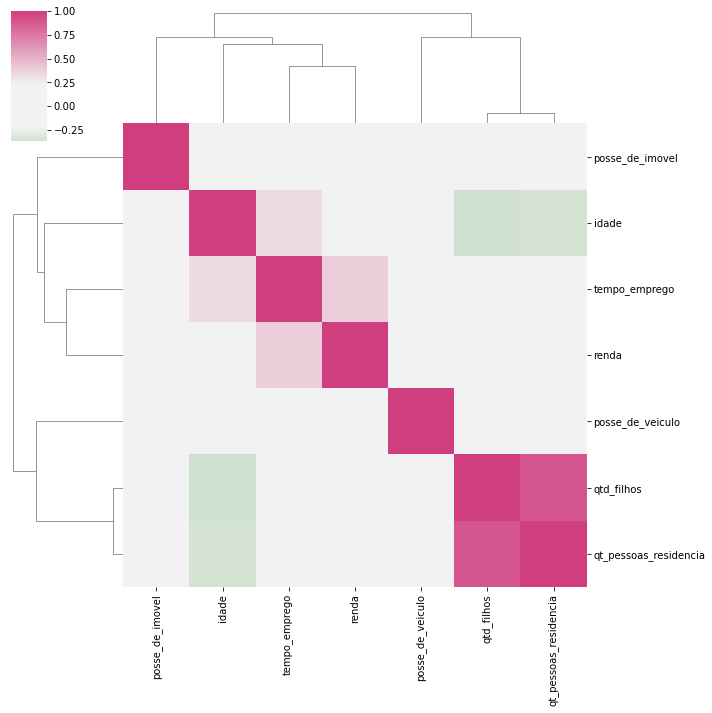

In [12]:
#gráfico da matriz
#construindo a paleta de cores
cmap = sns.diverging_palette(h_neg=125, #a cor do menor valor da matriz :-1
h_pos=350, #a cor do maior valor da matriz :+1
as_cmap=True, # Se True, retorna uma classe :class:`matplotlib.colors.Colormap`
sep = 60, #Tamanho da região intermediária
center = 'light'# Se o centro da paleta é claro(light) ou escuro(dark)
)

#construindo o gráfico
sns.clustermap(renda.iloc[:,2:].corr(), figsize=(10, 10), center = 0, cmap=cmap)

Tempo no emprego e posse de veículo são as variáveis que mais tem correlação com a renda.

Text(0.5, 1.0, 'Perfis Media Renda - Posse de Veículo')

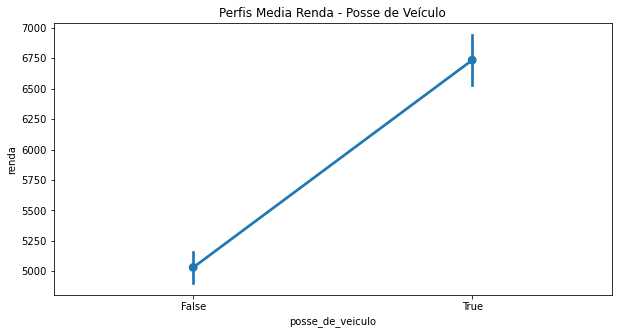

In [13]:
#perfil de média
plt.rc('figure', figsize=(10, 5))
ax = sns.pointplot(x="posse_de_veiculo", y="renda",
                   data=renda, dodge=True, ci = 90)
ax.set_title('Perfis Media Renda - Posse de Veículo')

Como pode ser visto no gráfico acima, o perfil de media da renda é bem distinto entre quem possui veículo e quem não possui, reafirmando o potencial preditor dessa variável.

## Etapa 3 Crisp-DM: Preparação dos dados


#### Tratando o dados faltantes

In [14]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   id_cliente             15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

In [15]:
#verificando o número de dados faltantes em tempo_emprego
renda.tempo_emprego.isna().sum()

2573

Conforme haviamos verificado, a coluna tempo_emprego possui 2573 dados faltantes, cerca de 17% dos registros da nosa base de dados. Para não perdermos esses dados, vamos tratar os dados ausentes preenchendo-os com a média do tempo_emprego.

In [16]:
renda.tempo_emprego.fillna(renda.tempo_emprego.mean(), inplace = True)

#### Excluindo variáveis desnecessárias

In [17]:
renda.drop(['data_ref', 'id_cliente'],axis=1, inplace = True)


Foram removidos 2.006 registros, considerados outliers pelos critérios do método interquartil.

### Separando a base em treinamento e teste (25% para teste, 75% para treinamento)

Para avaliar o desempenho do modelo, do conjunto de dados será divido em duas partes: uma base de treinamento e uma base de teste. A base de treinamento é usada para treinar o modelo, enquanto a base de teste é usada para avaliar sua capacidade de generalização. A divisão será feita de forma aleatória, reservando 25 % dos dados para o conjunto de teste, garantindo que o modelo seja avaliado em dados não vistos durante o treinamento.

In [18]:
y=renda.renda
x=renda.drop ('renda', axis =1)
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size =0.25, random_state = 10 )
print('Registros em x:',x.shape[0])
print('Registros em y:',y.shape[0])
print('---------------------')
print('Registros em y_teste:',y_teste.shape[0])
print('Registros em x_teste:',x_teste.shape[0])
print('---------------------')
print('Registros em x_treino:',x_treino.shape[0])
print('Registros em y_treino:',y_treino.shape[0])

Registros em x: 15000
Registros em y: 15000
---------------------
Registros em y_teste: 3750
Registros em x_teste: 3750
---------------------
Registros em x_treino: 11250
Registros em y_treino: 11250


### Criando df_treino e df_teste
Vamos criar um DataFrame **df_treino** (união entre x_treino e y_treino) e outro chamado **df_teste** (união entre x_teste e y_teste)  que poderão ser utilizados em algumas funções nas próxima etapas.

In [19]:
#Criando df_treino
df_treino = pd.DataFrame(y_treino).merge(x_treino, left_index=True, right_index= True , how='left')
df_treino

,renda,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia
12954,2363.54,F,False,True,1,Assalariado,Pós graduação,Solteiro,Casa,34,7.586301,2.0
14546,2386.12,M,True,True,0,Assalariado,Secundário,Casado,Casa,44,7.471233,2.0
12745,1857.38,F,False,False,0,Servidor público,Secundário,Casado,Aluguel,47,3.131507,2.0
13739,5850.26,M,True,False,1,Assalariado,Superior completo,Casado,Casa,51,5.246575,3.0
11381,1365.93,F,False,True,0,Assalariado,Secundário,Casado,Casa,40,1.715068,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11633,16270.99,M,True,True,0,Empresário,Superior completo,Solteiro,Casa,25,3.991781,1.0
1344,2493.55,F,False,False,0,Pensionista,Superior completo,Casado,Casa,55,7.722635,2.0
12815,3511.51,F,False,True,0,Pensionista,Secundário,Casado,Casa,62,7.722635,2.0
7293,2547.03,F,False,True,0,Pensionista,Secundário,Casado,Casa,62,7.722635,2.0


In [20]:
#Criando df_teste
df_teste = pd.DataFrame(y_teste).merge(x_teste, left_index=True, right_index= True , how='left')
df_teste

,renda,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia
13983,5034.94,F,True,True,0,Servidor público,Superior completo,Casado,Casa,54,3.180822,2.0
822,1855.51,F,False,False,0,Pensionista,Secundário,Casado,Governamental,47,7.722635,2.0
13752,5781.91,M,True,True,0,Assalariado,Superior incompleto,Casado,Casa,33,4.347945,2.0
9656,2053.90,F,False,False,0,Assalariado,Secundário,Viúvo,Casa,50,4.928767,1.0
13497,43433.94,M,True,False,1,Assalariado,Secundário,Casado,Governamental,47,12.463014,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9719,3765.75,F,False,False,0,Assalariado,Secundário,Separado,Estúdio,44,24.279452,1.0
3248,15919.06,M,False,True,1,Assalariado,Secundário,Casado,Casa,50,14.123288,3.0
1208,747.40,F,False,True,0,Assalariado,Secundário,Casado,Casa,52,4.386301,2.0
1564,25273.13,M,False,False,1,Assalariado,Primário,Casado,Casa,39,12.895890,3.0


### Criando df_treino_dummies e df_teste_dummies
Vamos criar dois novos Dataframes trasformandos as variáveis categóricas em dummies, o que será útil para algumas funções que serão utilizadas na etapa de modelagem.

In [21]:
#usando patsy para converter as variáveis categóricas do df_treino em dummies
modelo = 'renda + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + 0' 
df_treino_dummies = patsy.dmatrix( formula_like = modelo,data = df_treino, return_type = "dataframe")
df_treino_dummies

,sexo[F],sexo[M],posse_de_veiculo[T.True],posse_de_imovel[T.True],tipo_renda[T.Bolsista],tipo_renda[T.Empresário],tipo_renda[T.Pensionista],tipo_renda[T.Servidor público],educacao[T.Pós graduação],educacao[T.Secundário],...,tipo_residencia[T.Casa],tipo_residencia[T.Com os pais],tipo_residencia[T.Comunitário],tipo_residencia[T.Estúdio],tipo_residencia[T.Governamental],renda,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia
12954,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2363.54,1.0,34.0,7.586301,2.0
14546,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,2386.12,0.0,44.0,7.471233,2.0
12745,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1857.38,0.0,47.0,3.131507,2.0
13739,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,5850.26,1.0,51.0,5.246575,3.0
11381,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1365.93,0.0,40.0,1.715068,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11633,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,16270.99,0.0,25.0,3.991781,1.0
1344,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2493.55,0.0,55.0,7.722635,2.0
12815,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3511.51,0.0,62.0,7.722635,2.0
7293,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,2547.03,0.0,62.0,7.722635,2.0


In [22]:
#usando patsy para converter as variáveis categóricas do df_teste em dummies
modelo = 'renda + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + 0' 
df_teste_dummies = patsy.dmatrix( formula_like = modelo,data = df_teste, return_type = "dataframe")
df_teste_dummies

,sexo[F],sexo[M],posse_de_veiculo[T.True],posse_de_imovel[T.True],tipo_renda[T.Bolsista],tipo_renda[T.Empresário],tipo_renda[T.Pensionista],tipo_renda[T.Servidor público],educacao[T.Pós graduação],educacao[T.Secundário],...,tipo_residencia[T.Casa],tipo_residencia[T.Com os pais],tipo_residencia[T.Comunitário],tipo_residencia[T.Estúdio],tipo_residencia[T.Governamental],renda,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia
13983,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,5034.94,0.0,54.0,3.180822,2.0
822,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1855.51,0.0,47.0,7.722635,2.0
13752,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,5781.91,0.0,33.0,4.347945,2.0
9656,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,2053.90,0.0,50.0,4.928767,1.0
13497,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,43433.94,1.0,47.0,12.463014,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,3765.75,0.0,44.0,24.279452,1.0
3248,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,15919.06,1.0,50.0,14.123288,3.0
1208,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,747.40,0.0,52.0,4.386301,2.0
1564,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,25273.13,1.0,39.0,12.895890,3.0


## Etapa 4 Crisp-DM: Modelagem

O objetivo aqui é desenvolver um modelo preciso capaz de prever a renda com base nas variáveis disponíveis em nosso conjunto de dados.  Com base na natureza do problema e nas características dos dados foi escolhido avaliar alguns modelos de regressão linear e árvore de regressão

### Rodando os modelos


Vamos rodar alguns modelos de regressões e avaliar o desempenho na base teste  e escolher dentres estes o modelo com melhor desempenho segundo o critério do coeficiente de determinação (R²). 

#### Regressão com regularização Ridge com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avaliação do R2 na base de testes

Nesta primeira etapa, vamos rodar 6 regressões considerando a regularização Ridge e todas as variáveis explicativas possíveis contudo, cada regularização terá um valor diferente para o parâmetro alpha.

A regularização Ridge adiciona um termo de penalização à função de perda do algoritmo da regressão, que é proporcional ao quadrado dos coeficientes de regressão. Esse termo de penalização tem o efeito de reduzir o valor absoluto dos coeficientes, incentivando-os a serem menores e mais próximos de zero. Dessa forma, a regularização Ridge ajuda a evitar o overfitting, tornando o modelo mais estável e menos sensível a variações nos dados de treinamento.



In [23]:
#Criando uma lista com uma regressão para cada alpha

alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1] 
regressoes_ridge = []

for alpha in alphas: 

    modelo = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia' 
    md = smf.ols(modelo, data = df_treino)
    regressoes_ridge.append( md.fit_regularized(method = 'elastic_net' 
                             , refit = True 
                             , L1_wt = 0 #0 para Ridge
                             , alpha = alpha) )
   

In [24]:
#Calculando R2 na base de teste

#Calculando R2 de cada regressão e adicionando a R2_list
R2_list=[]

for reg in regressoes_ridge:

    #criando dataframe para  calculo da correlação do y_Teste x y_teste_predito
    df_y_teste_predito = pd.DataFrame(reg.predict(x_teste))
    df_y_teste_real = pd.DataFrame(y_teste)
    df_corr = pd.DataFrame(df_y_teste_real).merge(df_y_teste_predito, left_index=True, right_index= True , how='left')
    #Calculo da Correlação entre  y_Teste x y_teste_predito
    r = df_corr.corr().iloc[0,1]
    #Calculo do R² entre  y_Teste x y_teste_predito
    R2 = r**2
    R2_list.append(R2)

In [25]:
# Criando um DataFrame comparando os R2 de cada modelo

dic_R2 = { 'Modelos': [] ,
          'Regularização': [],
           'Alpha':   [],
           'R2' :     [],
         }
i= 0

for reg in regressoes_ridge:
    i_string= str(i+1)                       
    dic_R2['Modelos'].append('Modelo '+i_string)
    dic_R2['Alpha'].append(alphas[i])
    dic_R2['Regularização'].append('Ridge')
    dic_R2['R2'].append(R2_list[i])  
    i=i+1 
    
df_ridge = pd.DataFrame(dic_R2)
df_ridge    

,Modelos,Regularização,Alpha,R2
0,Modelo 1,Ridge,0.000,0.270221
1,Modelo 2,Ridge,0.001,0.270240
2,Modelo 3,Ridge,0.005,0.270065
3,Modelo 4,Ridge,0.010,0.269603
4,Modelo 5,Ridge,0.050,0.263012
5,Modelo 6,Ridge,0.100,0.253279


#### Regressão regularização LASSO com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avaliação do R2 na base de testes

Nesta etapa, também vamos rodar 6 regressões considerando com todas as variáveis explicativas possíveis e mesmos valores alphas da etapa anterior, contudo utilizaremos o método de Regressão LASSO.

A regularização Lasso é uma técnica utilizada em modelos de regressão para reduzir a complexidade e selecionar automaticamente as variáveis mais relevantes. Ao adicionar um termo de penalização proporcional à soma dos valores absolutos dos coeficientes de regressão, a regularização Lasso incentiva a diminuição de coeficientes irrelevantes para zero. Isso facilita a interpretação do modelo, elimina a multicolinearidade e melhora a capacidade de generalização.

In [26]:
#Criando uma lista com uma regressão LASSO para cada alpha

alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1] 
regressoes_lasso = []

for alpha in alphas: 

    modelo = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia' 
    md = smf.ols(modelo, data = df_treino)
    regressoes_lasso.append( md.fit_regularized(method = 'elastic_net' 
                             , refit = True 
                             , L1_wt = 1 #1 para LASSO
                             , alpha = alpha) )

In [27]:
#Calculando R2 na base de teste

#Calculando R2 de cada regressão e adicionando a R2_list
R2_list=[]

for reg in regressoes_lasso:

    #criando dataframe para  calculo da correlação do y_Teste x y_teste_predito
    df_y_teste_predito = pd.DataFrame(reg.predict(x_teste))
    df_y_teste_real = pd.DataFrame(y_teste)
    df_corr = pd.DataFrame(df_y_teste_real).merge(df_y_teste_predito, left_index=True, right_index= True , how='left')
    #Calculo da Correlação entre  y_Teste x y_teste_predito
    r = df_corr.corr().iloc[0,1]
    #Calculo do R² entre  y_Teste x y_teste_predito
    R2 = r**2
    R2_list.append(R2)

In [28]:
# Criando um DataFrame comparando os R2 de cada modelo

dic_R2 = { 'Modelos': [] ,
          'Regularização': [],
           'Alpha':   [],
           'R2' :     [],
         }
i= 0

for reg in regressoes_lasso:
    i_string= str(i+7)                       
    dic_R2['Modelos'].append('Modelo '+i_string)
    dic_R2['Alpha'].append(alphas[i])
    dic_R2['Regularização'].append('Lasso')
    dic_R2['R2'].append(R2_list[i])  
    i=i+1 
    
df_lasso = pd.DataFrame(dic_R2)

In [29]:
# Juntando os dataframes com os R2 dos modelos
df_comparativo = pd.concat([df_ridge,df_lasso])
df_comparativo

,Modelos,Regularização,Alpha,R2
0,Modelo 1,Ridge,0.000,0.270221
1,Modelo 2,Ridge,0.001,0.270240
2,Modelo 3,Ridge,0.005,0.270065
3,Modelo 4,Ridge,0.010,0.269603
4,Modelo 5,Ridge,0.050,0.263012
5,Modelo 6,Ridge,0.100,0.253279
0,Modelo 7,Lasso,0.000,0.270221
1,Modelo 8,Lasso,0.001,0.270221
2,Modelo 9,Lasso,0.005,0.270221
3,Modelo 10,Lasso,0.010,0.270221


### Rodando um modelo de Regressão com stepwise

O algoritmo stepwise é uma técnica utilizada em modelos de regressão para selecionar as melhores variáveis explicativas para o modelo. Ele é chamado de "stepwise" devido ao processo sequencial de adicionar e remover variáveis com base em critérios estatísticos.

Aqui vamos rodar um modelo de regressão com as variáveis escolhidas pelo stepwise.



In [30]:
X = df_treino_dummies.drop('renda', axis =  1)
y = df_treino_dummies['renda']

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X, y)

print('resulting features:')
print(variaveis)

Add  tempo_emprego                  with p-value 0.0
#############
['tempo_emprego']
Add  sexo[F]                        with p-value 0.0
#############
['tempo_emprego', 'sexo[F]']
Add  sexo[M]                        with p-value 0.0
#############
['tempo_emprego', 'sexo[F]', 'sexo[M]']
Add  tipo_renda[T.Pensionista]      with p-value 9.87165e-11
#############
['tempo_emprego', 'sexo[F]', 'sexo[M]', 'tipo_renda[T.Pensionista]']
Add  idade                          with p-value 2.69129e-07
#############
['tempo_emprego', 'sexo[F]', 'sexo[M]', 'tipo_renda[T.Pensionista]', 'idade']
Add  educacao[T.Superior completo]  with p-value 1.26655e-06
#############
['tempo_emprego', 'sexo[F]', 'sexo[M]', 'tipo_renda[T.Pensionista]', 'idade', 'educacao[T.Superior completo]']
Add  tipo_renda[T.Empresário]       with p-value 0.000120713
#############
['tempo_emprego', 'sexo[F]', 'sexo[M]', 'tipo_renda[T.Pensionista]', 'idade', 'educacao[T.Superior completo]', 'tipo_renda[T.Empresário]']
Add  qt_pessoas

**Stepwise escolheu as seguintes variáveis:**

'tempo_emprego', 'sexo[T.M]', 'idade', 'tipo_renda[T.Empresário]','tipo_renda[T.Pensionista]' 'educacao[T.Superior completo]', 'qt_pessoas_residencia', 'posse_de_imovel[T.True]'

#### Acertando o dataframe de teste e de treino para excluir as variáveis não escolhidas pelo stepwise

In [31]:
#Criando novas variáveis no df_treino
df_treino.loc[ df_treino['educacao'] == 'Primário', 'educacao2'] ='Outro'
df_treino.loc[ df_treino['educacao'] == 'Secundário', 'educacao2'] = 'Outro'
df_treino.loc[ df_treino['educacao'] == 'Superior completo', 'educacao2'] = 'Superior completo'
df_treino.loc[ df_treino['educacao'] == 'Superior incompleto', 'educacao2'] = 'Outro'
df_treino.loc[ df_treino['educacao'] == 'Pós graduação', 'educacao2'] = 'Outro'

df_treino.loc[ df_treino['tipo_renda'] == 'Empresário', 'tipo_renda2'] ='Empresário'
df_treino.loc[ df_treino['tipo_renda'] == 'Assalariado', 'tipo_renda2'] = 'Outro'
df_treino.loc[ df_treino['tipo_renda'] == 'Servidor público', 'tipo_renda2'] = 'Outro'
df_treino.loc[ df_treino['tipo_renda'] == 'Pensionista', 'tipo_renda2'] = 'Pensionista'
df_treino.loc[ df_treino['tipo_renda'] == 'Bolsista', 'tipo_renda2'] = 'Outro'

df_treino[['educacao', 'educacao2','tipo_renda','tipo_renda2']].head()

,educacao,educacao2,tipo_renda,tipo_renda2
12954,Pós graduação,Outro,Assalariado,Outro
14546,Secundário,Outro,Assalariado,Outro
12745,Secundário,Outro,Servidor público,Outro
13739,Superior completo,Superior completo,Assalariado,Outro
11381,Secundário,Outro,Assalariado,Outro


In [32]:
#Criando novas variáveis no x_teste
x_teste.loc[ x_teste['educacao'] == 'Primário', 'educacao2'] ='Outro'
x_teste.loc[ x_teste['educacao'] == 'Secundário', 'educacao2'] = 'Outro'
x_teste.loc[ x_teste['educacao'] == 'Superior completo', 'educacao2'] = 'Superior completo'
x_teste.loc[ x_teste['educacao'] == 'Superior incompleto', 'educacao2'] = 'Outro'
x_teste.loc[ x_teste['educacao'] == 'Pós graduação', 'educacao2'] = 'Outro'

x_teste.loc[ x_teste['tipo_renda'] == 'Empresário', 'tipo_renda2'] ='Empresário'
x_teste.loc[ x_teste['tipo_renda'] == 'Assalariado', 'tipo_renda2'] = 'Outro'
x_teste.loc[ x_teste['tipo_renda'] == 'Servidor público', 'tipo_renda2'] = 'Outro'
x_teste.loc[ x_teste['tipo_renda'] == 'Pensionista', 'tipo_renda2'] = 'Pensionista'
x_teste.loc[ x_teste['tipo_renda'] == 'Bolsista', 'tipo_renda2'] = 'Outro'

x_teste[['educacao', 'educacao2','tipo_renda','tipo_renda2']].head()

,educacao,educacao2,tipo_renda,tipo_renda2
13983,Superior completo,Superior completo,Servidor público,Outro
822,Secundário,Outro,Pensionista,Pensionista
13752,Superior incompleto,Outro,Assalariado,Outro
9656,Secundário,Outro,Assalariado,Outro
13497,Secundário,Outro,Assalariado,Outro


In [33]:
modelo = 'renda ~ sexo+  idade + educacao2+ C(tipo_renda2,Treatment(1)) + qt_pessoas_residencia + tempo_emprego + posse_de_imovel' 
md = smf.ols(modelo, data = df_treino)
reg=md.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     493.7
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:42:58   Log-Likelihood:            -1.1608e+05
No. Observations:               11250   AIC:                         2.322e+05
Df Residuals:                   11241   BIC:                         2.322e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                   -3581.4476    448.308     -7.989      0.000   -4460.209   -2702.686
sexo[T.M]                                    5869.4150    153.278     38.293      0.000    5568.963    6169.867
educacao2[T.Superior completo]                666.4178    145.774      4.572      0.000     380.675     952.161
C(tipo_renda2, Treatment(1))[T.Empresário]    675.7032    170.683      3.959      0.000     341.135    1010.272
C(tipo_renda2, Treatment(1))[T.Pensionista] -1755.5024    243.199     -7.218      0.000   -2232.216   -1278.789
posse_de_imovel[T.True]                       368.3896    149.277      2.468      0.014      75.780     660.999
idade                                          49.3538      8.593      5.743      0.000      32.510      66.198
qt_pessoas_residencia                         205.8331     80.885      2.545      0.011      47.283     364.383
tempo_emprego                                 573.3503     11.995     47.801      0.000     549.839     596.862
==============================================================================
Omnibus:                    17015.791   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13918374.010
Skew:                           9.172   Prob(JB):                         0.00
Kurtosis:                     174.336   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Avaliando o coeficiente de determinação R² do modelo stepwise na base de testes

In [34]:
#criando dataframe para  calculo da correlação do y_Teste x y_teste_predito
df_y_teste_predito = pd.DataFrame(reg.predict(x_teste))
df_y_teste_real = pd.DataFrame(y_teste)
df_corr = pd.DataFrame(df_y_teste_real).merge(df_y_teste_predito, left_index=True, right_index= True , how='left')
#Calculo da Correlação entre  y_Teste x y_teste_predito
r = df_corr.corr().iloc[0,1]
#Calculo do R² entre  y_Teste x y_teste_predito
R2 = r**2
R2

0.2702578262273756

In [35]:
df_step = pd.DataFrame({ 'Modelos': ['Modelo 13'],'Regularização': ['Stepwise'],'Alpha':  ['---'],'R2' :[R2],})
# Juntando os dataframes modelos
df_comparativo = pd.concat([df_comparativo,df_step])
df_comparativo

,Modelos,Regularização,Alpha,R2
0,Modelo 1,Ridge,0.0,0.270221
1,Modelo 2,Ridge,0.001,0.270240
2,Modelo 3,Ridge,0.005,0.270065
3,Modelo 4,Ridge,0.01,0.269603
4,Modelo 5,Ridge,0.05,0.263012
5,Modelo 6,Ridge,0.1,0.253279
0,Modelo 7,Lasso,0.0,0.270221
1,Modelo 8,Lasso,0.001,0.270221
2,Modelo 9,Lasso,0.005,0.270221
3,Modelo 10,Lasso,0.01,0.270221


Com base apenas no critério  do coeficiente de determinação R2, o modelo 12 é o mais preciso. Tentaremos melhorá-lo com uma transformação na variável resposta

### Modelo 14 com log na variável resposta.

Vamos rodar um modelo de regressão com os mesmos parâmetros do modelo 12 (todas variáveis, regularização LASSO e  alpha = 0.1) porém transformando a variável resposta em uma função logarítmica. 

In [36]:
modelo = 'np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia' 
md = smf.ols(modelo, data = df_treino)
reg= md.fit_regularized(method = 'elastic_net' 
                             , refit = True 
                             , L1_wt = 1 #1 para LASSO
                             , alpha = 0.1)
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     1389.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:43:04   Log-Likelihood:                -12324.
No. Observations:               11250   AIC:                         2.466e+04
Df Residuals:                   11246   BIC:                         2.470e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.4793      0.030    252.233      0.000       7.421       7.537
sexo[T.M]                            0.8011      0.015     53.400      0.000       0.772       0.831
posse_de_veiculo[T.True]                  0          0        nan        nan           0           0
posse_de_imovel[T.True]                   0          0        nan        nan           0           0
tipo_renda[T.Bolsista]                    0          0        nan        nan           0           0
tipo_renda[T.Empresário]                  0          0        nan        nan           0           0
tipo_renda[T.Pensionista]                 0          0        nan        nan           0           0
tipo_renda[T.Servidor público]            0          0        nan        nan           0           0
educacao[T.Pós graduação]                 0          0        nan        nan           0           0
educacao[T.Secundário]                    0          0        nan        nan           0           0
educacao[T.Superior completo]             0          0        nan        nan           0           0
educacao[T.Superior incompleto]           0          0        nan        nan           0           0
estado_civil[T.Separado]                  0          0        nan        nan           0           0
estado_civil[T.Solteiro]                  0          0        nan        nan           0           0
estado_civil[T.União]                     0          0        nan        nan           0           0
estado_civil[T.Viúvo]                     0          0        nan        nan           0           0
tipo_residencia[T.Casa]                   0          0        nan        nan           0           0
tipo_residencia[T.Com os pais]            0          0        nan        nan           0           0
tipo_residencia[T.Comunitário]            0          0        nan        nan           0           0
tipo_residencia[T.Estúdio]                0          0        nan        nan           0           0
tipo_residencia[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                0          0        nan        nan           0           0
idade                               -0.0007      0.001     -1.048      0.295      -0.002       0.001
tempo_emprego                        0.0642      0.001     55.654      0.000       0.062       0.066
qt_pessoas_residencia                     0          0        nan        nan           0           0
==============================================================================
Omnibus:                        5.034   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.077
Skew:             

#### Avaliando o coeficiente de determinação R² do modelo 14 na base de testes

In [37]:
#criando dataframe para  calculo da correlação do y_Teste x y_teste_predito
df_y_teste_predito = pd.DataFrame(reg.predict(x_teste))
df_y_teste_real = pd.DataFrame(y_teste)
df_corr = pd.DataFrame(df_y_teste_real).merge(df_y_teste_predito, left_index=True, right_index= True , how='left')
#Calculo da Correlação entre  y_Teste x y_teste_predito
r = df_corr.corr().iloc[0,1]
#Calculo do R² entre  y_Teste x y_teste_predito
R2 = r**2
R2

0.2650574385252308

In [38]:
df_step = pd.DataFrame({ 'Modelos': ['Modelo 14 - log(y)'],'Regularização': ['LASSO'],'Alpha':  ['0.1'],'R2' :[R2],})
# Juntando os dataframes modelos
df_comparativo = pd.concat([df_comparativo,df_step])
df_comparativo

,Modelos,Regularização,Alpha,R2
0,Modelo 1,Ridge,0.0,0.270221
1,Modelo 2,Ridge,0.001,0.270240
2,Modelo 3,Ridge,0.005,0.270065
3,Modelo 4,Ridge,0.01,0.269603
4,Modelo 5,Ridge,0.05,0.263012
5,Modelo 6,Ridge,0.1,0.253279
0,Modelo 7,Lasso,0.0,0.270221
1,Modelo 8,Lasso,0.001,0.270221
2,Modelo 9,Lasso,0.005,0.270221
3,Modelo 10,Lasso,0.01,0.270221


A regularização LASSO, neste caso, "zerou" a maioria das variáveis, deixando o modelo menos complexo mas com coeficiente de determinação um pouco menor que outros modelos. Contudo, esse modelo de regressão irá ignorar variáveis que foram avaliadas como importantes na predição da renda das pessoas, como posse_de_veiculo.

### Rodando modelos de Árvore de Regressão

Vamos ajustar um modelo de Árvore de Regressão aos nossos dados e avaliar se os resultados do R² são melhores que os modelos de regressão anteriores.

In [39]:
%%time
X = df_treino_dummies.drop('renda', axis =  1)
y = df_treino_dummies['renda']
reg_tree = DecisionTreeRegressor(random_state = 10)
reg_tree.fit(X, y) 

CPU times: total: 46.9 ms
Wall time: 70.4 ms


DecisionTreeRegressor(random_state=10)

In [40]:
#Calculando o caminho indicado pelos CCP-alfas dessa árvore
path = reg_tree.cost_complexity_pruning_path(X, y) # X e y são os dados de treino
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 1.65568458e-13, 3.31136915e-13, ...,
       3.50777781e+06, 5.97814324e+06, 8.48129328e+06])

In [ ]:
%%time
#Treinando uma árvore para cada ccp_alpha e colocando em uma lista
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X, y) # X e y são os dados de treino
    clfs.append(clf)


####  Cálculo do MSE de cada Árvore

In [ ]:
%%time
X_ = df_teste_dummies.drop('renda', axis =  1)
y_ = df_teste_dummies['renda']
train_scores = [mean_squared_error(y , clf.predict(X)) for clf in clfs]
test_scores  = [mean_squared_error(y_  , clf.predict(X_ )) for clf in clfs]

#### Gráfico do MSE pelo alpha

In [ ]:
#### Montando um gráfico do MSE pelo alpha, melhor valor de alpha será o mais perto do ponto de mínimo do MSE
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()


In [ ]:
arvore_final =  DecisionTreeRegressor(random_state=0, ccp_alpha= 1)
arvore_final.fit(X, y)
print(f"Profundidade: {arvore_final.tree_.max_depth}")
print(f"MSE na base de testes: {mean_squared_error(y_, arvore_final.predict(X_)):.2f}")
print(f"R-quadrado na base de testes: {arvore_final.score(X_, y_):.2f}")

In [ ]:
# montando um df comparativo
df = pd.DataFrame({ 'Modelos': ['Modelo 15 - Árvore de Regressão'],'Regularização': ['---'],'Alpha':  ['---'],'R2' :[arvore_final.score(X_, y_)]})
df_comparativo = pd.concat([df_comparativo,df])
df_comparativo

Conseguimos uma árvore de Regressão com um melhor R² dentre os modelos estudados.

## Etapa 5 Crisp-DM: Avaliação dos resultados


Foram modeladas algumas regressões e árvores de regressão para analisar e prever os resultados desejados. No entanto, os modelos desenvolvidos apresentaram um coeficiente de determinação (R²) máximo de 0,33, indicando um valor relativamente baixo de ajuste aos dados.

Apenas 33% da variabilidade dos dados de saída está sendo explicada pelas variáveis independentes consideradas nos modelos. Essa baixa capacidade de explicação pode ser atribuída a uma série de fatores, como a complexidade do problema em questão, a qualidade dos dados disponíveis, a escolha inadequada das variáveis independentes ou que haja variáveis relevantes não consideradas.

Salientando que, foram utilizadas as técnicas e etratégias vistas até este ponto do curso de Cientista de Dados da EBAC. Novas técnicas podem ser aplicadas posteriormente para melhorar  o resultado deste projeto.


## Etapa 6 Crisp-DM: Implantação


Utilizando-se da ferramenta Streamlit, será construído uma ferramenta que fará de maneira interativa a análise descritiva dos dados dos clientes utilizados nesse projeto.

Posteriormente, o  modelo preditivo originado desse projeto poderia ser implantado em uma aplicação que dimensione o limite de cartões de crédito dos clientes com  certo grau de automação baseado em suas rendas estimadas. Ajudando a evitar concessões de crédito excessivas ou limites muito baixos, reduzindo riscos e otimizando a gestão de crédito.